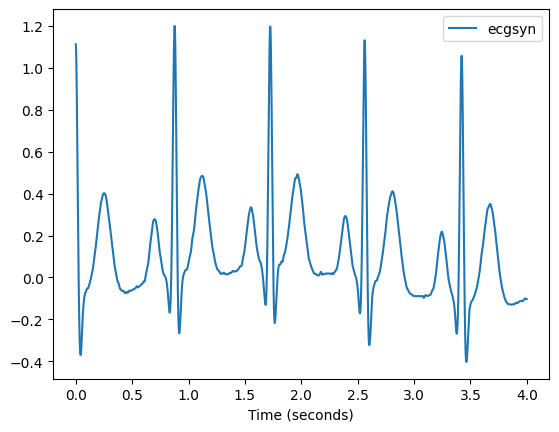

In [3]:
import neurokit2 as nk

#ecg1 = nk.ecg_simulate(duration=10, method="simple")
fs = 1000
ecg2 = nk.ecg_simulate(duration=4, sampling_rate=fs,method="ecgsyn")

# Visualize result
nk.signal_plot([ecg2], sampling_rate=fs, labels=["ecgsyn"])

In [7]:
ecg2, len(ecg2)

(array([ 1.11330921,  1.1088761 ,  1.09873703, ..., -0.10396672,
        -0.10392491, -0.10366722], shape=(4000,)),
 4000)

In [10]:
import numpy as np

In [16]:
ecg3  = (ecg2+1)*1000 
ecg3

array([2113.30921057, 2108.87609734, 2098.73703426, ...,  896.03327822,
        896.0750857 ,  896.33278158], shape=(4000,))

In [18]:
ecg3 = np.round(ecg3,0).astype(int)
ecg3, len(ecg3)

(array([2113, 2109, 2099, ...,  896,  896,  896], shape=(4000,)), 4000)

In [19]:
np.max(ecg3)

np.int64(2201)

In [22]:
data_ecg = np.round(ecg3/np.max(ecg3)*255)
data_ecg, len(data_ecg)

(array([245., 244., 243., ..., 104., 104., 104.], shape=(4000,)), 4000)

In [32]:
data_ecg = data_ecg.astype(int)
data_ecg, len(data_ecg)

(array([245, 244, 243, ..., 104, 104, 104], shape=(4000,)), 4000)

In [33]:
print(data_ecg.tolist())

[245, 244, 243, 241, 239, 236, 232, 228, 223, 218, 212, 207, 201, 194, 188, 181, 174, 168, 161, 154, 147, 141, 135, 129, 123, 118, 112, 108, 103, 99, 95, 91, 88, 85, 83, 81, 79, 77, 76, 74, 74, 73, 73, 73, 73, 74, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 88, 89, 91, 92, 93, 95, 96, 97, 98, 99, 100, 100, 101, 102, 102, 103, 103, 104, 105, 105, 105, 106, 106, 106, 106, 107, 107, 107, 107, 108, 108, 108, 108, 108, 108, 108, 109, 109, 109, 109, 109, 109, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 111, 111, 111, 111, 112, 112, 112, 112, 112, 113, 113, 113, 113, 113, 114, 114, 114, 114, 115, 115, 115, 116, 116, 116, 117, 117, 117, 117, 118, 118, 118, 118, 119, 119, 119, 120, 120, 120, 121, 121, 122, 122, 123, 123, 124, 124, 125, 125, 126, 126, 127, 127, 128, 128, 128, 129, 129, 130, 130, 131, 131, 132, 132, 133, 133, 134, 134, 135, 136, 136, 137, 137, 138, 138, 139, 139, 140, 141, 141, 142, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147, 148, 149, 149, 14

In [42]:
l_da = list(map(lambda x: x, data_ecg.tolist()))
print(l_da)

[245, 244, 243, 241, 239, 236, 232, 228, 223, 218, 212, 207, 201, 194, 188, 181, 174, 168, 161, 154, 147, 141, 135, 129, 123, 118, 112, 108, 103, 99, 95, 91, 88, 85, 83, 81, 79, 77, 76, 74, 74, 73, 73, 73, 73, 74, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 88, 89, 91, 92, 93, 95, 96, 97, 98, 99, 100, 100, 101, 102, 102, 103, 103, 104, 105, 105, 105, 106, 106, 106, 106, 107, 107, 107, 107, 108, 108, 108, 108, 108, 108, 108, 109, 109, 109, 109, 109, 109, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 111, 111, 111, 111, 112, 112, 112, 112, 112, 113, 113, 113, 113, 113, 114, 114, 114, 114, 115, 115, 115, 116, 116, 116, 117, 117, 117, 117, 118, 118, 118, 118, 119, 119, 119, 120, 120, 120, 121, 121, 122, 122, 123, 123, 124, 124, 125, 125, 126, 126, 127, 127, 128, 128, 128, 129, 129, 130, 130, 131, 131, 132, 132, 133, 133, 134, 134, 135, 136, 136, 137, 137, 138, 138, 139, 139, 140, 141, 141, 142, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147, 148, 149, 149, 14

In [40]:
s =  l_da  # your blob
nums = [int(tok.strip().strip("',"), 16) for tok in s.split()]
print(', '.join(f'0x{v:02X}' for v in nums))


AttributeError: 'list' object has no attribute 'split'

[2085.33145297 2080.83199827 2070.49476688 ... 1481.04171888 1481.35784917
 1481.40131829] 2000


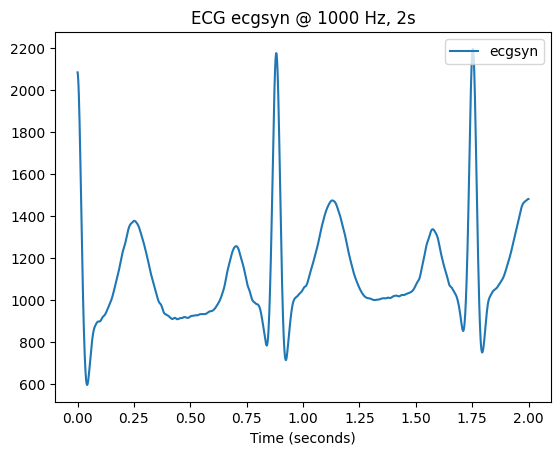

[INFO] Transmitiendo ECG en bucle. Ctrl+C para salir.

[INFO] Interrumpido por usuario.
[INFO] Puerto serial cerrado.


In [77]:
# pip install neurokit2 pyserial numpy matplotlib
import time
import sys
import serial
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt

# -----------------------------
# Parámetros
# -----------------------------
fs = 1000                 # Hz (frecuencia de muestreo)
duration_s = 2          # segundos por ciclo (se reenvía en bucle infinito)
PORT = "/dev/ttyACM1"    # Linux/Mac: /dev/ttyACM0 o /dev/ttyUSB0 ; Windows: "COM3"
BAUD = 115200
SHOW_PLOT = True         # Pon en False si no deseas el gráfico

# -----------------------------
# Generar señal ECG (ecgsyn) a fs
# -----------------------------
ecg2 = nk.ecg_simulate(duration=duration_s, sampling_rate=fs, method="ecgsyn")
# Asegurar formato entero si quieres envío compacto; aquí mantenemos float y lo redondeamos al vuelo
ecg2 = np.asarray(ecg2, dtype=float)
ecg2  = (ecg2+1)*1000
print(ecg2, len(ecg2))

# -----------------------------
# (Opcional) Visualizar para validar
# -----------------------------
if SHOW_PLOT:
    nk.signal_plot(ecg2, sampling_rate=fs, labels=["ecgsyn"])
    plt.title(f"ECG ecgsyn @ {fs} Hz, {duration_s}s")
    plt.show(block=False)
    plt.pause(0.1)

# -----------------------------
# Envío por Serial en tiempo real
# -----------------------------
sleep_s = 1.0 / fs

def open_serial(port, baud):
    try:
        ser = serial.Serial(port, baud, timeout=1)
        time.sleep(2.0)  # dar tiempo al reset del Arduino (USB nativo)
        ser.reset_input_buffer()
        ser.reset_output_buffer()
        return ser
    except Exception as e:
        print(f"[ERROR] No se pudo abrir {port} @ {baud} -> {e}")
        sys.exit(1)

def main():
    ser = open_serial(PORT, BAUD)

    # Leer "READY" opcional del Arduino
    t0 = time.time()
    while time.time() - t0 < 3.0:
        if ser.in_waiting:
            line = ser.readline().decode(errors="ignore").strip()
            if "READY" in line:
                print("[INFO] Arduino listo:", line)
                break

    print("[INFO] Transmitiendo ECG en bucle. Ctrl+C para salir.")
    idx = 0

    try:
        while True:
            # Recorremos ecg2 y lo reenviamos en bucle infinito
            for val in ecg2:
                # Si quieres ASCII: idx,valor\n
                # Redondeo a int para Serial Plotter más “limpio”; usa float si quieres mayor precisión.
                ival = int(round(val))

                packet = f"{idx},{ival}\n"
                ser.write(packet.encode())

                # (Opcional) leer retornos del Arduino sin bloquear
                if ser.in_waiting:
                    rx = ser.readline().decode(errors="ignore").strip()
                    # print("RX:", rx)  # descomenta si quieres ver ACK/diagnóstico

                # Temporización “tiempo real”
                time.sleep(sleep_s)
                idx += 1

            # Al terminar el vector, reinicia y continúa
            # (así simulas streaming continuo)
    except KeyboardInterrupt:
        print("\n[INFO] Interrumpido por usuario.")
    finally:
        ser.close()
        print("[INFO] Puerto serial cerrado.")

if __name__ == "__main__":
    main()


In [53]:
!ls /dev/ttyACM*

/dev/ttyACM0


In [67]:
!lsof /dev/ttyACM0

lsof: WARNING: can't stat() overlay file system /mnt/disco/docker/overlay2/a7b01f4d8179ef03f2b955f8fdeffdd3952ddda0bf019d1506705338ce77cd42/merged
      Output information may be incomplete.
lsof: WARNING: can't stat() overlay file system /mnt/disco/docker/overlay2/2e570d64e994bf370ef509f3530011a07863de648d42b528e703fef8a13acafc/merged
      Output information may be incomplete.
lsof: WARNING: can't stat() nsfs file system /run/docker/netns/06a008c76867
      Output information may be incomplete.
lsof: WARNING: can't stat() nsfs file system /run/docker/netns/d79d52656fe2
      Output information may be incomplete.
COMMAND      PID    USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
serial-mo 160979 hinton2    3u   CHR  166,0      0t0 2675 /dev/ttyACM0


In [68]:
!fuser -v /dev/ttyACM0


                     USER        PID ACCESS COMMAND
/dev/ttyACM0:        hinton2   160979 F.... serial-monitor


In [70]:
ser = serial.Serial("/dev/ttyACM0", 115200, timeout=1, exclusive=True)


In [71]:
ser.close()